# Prediction of Credit Approval

## Part 4: Predicting the Credit Approval Using Selected Features Based on SHAP Values in Each Fold(Adaboost)

### Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from ipynb.fs.defs.func import histogram, measures, evaluation_plot
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, ConfusionMatrixDisplay

### Load Preprocessed Dataset

In [2]:
with open('x_train.pickle', 'rb')as file:
    x_train=pickle.load(file)
    
with open('x_test.pickle', 'rb')as file:
    x_test=pickle.load(file)
    
with open('y_train.pickle', 'rb')as file:
    y_train=pickle.load(file)
    
with open('y_test.pickle', 'rb')as file:
    y_test=pickle.load(file)

In [3]:
with open('RandomForest.pkl' , 'rb') as file:
  RF = pickle.load(file)

### Cross-Validation and Model Saving for AdaBoost Classifier

In [4]:
kf = KFold(n_splits=5, random_state=0, shuffle= True)

In [5]:
imba_pipeline = make_pipeline(RandomForestClassifier())
print(f"Cross validation score: {cross_val_score(imba_pipeline, x_train, y_train, scoring='accuracy', cv=kf)}")

# Grid search
params = {
    'n_estimators': [110,120,130,140,150],
    'max_depth': [13,14,15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy', return_train_score=True)

RF = grid_imba.fit(x_train, y_train)
# Get predictions and their indexes for each fold
fold_predictions = []
fold_indexes = []
fold_models = []  # List to store the trained models
fold_train_indexes = []  # List to store train indexes for each fold
for fold, (train_index, val_index) in enumerate(kf.split(x_train), 1):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    imba_pipeline.fit(x_train_fold, y_train_fold)
    fold_pred = imba_pipeline.predict(x_val_fold)
    fold_predictions.append(fold_pred)
    fold_indexes.append(val_index)
    fold_models.append(imba_pipeline)  # Save the trained model
    fold_train_indexes.append(train_index)  # Save the train indexes
    
    # Save the model to a file
    model_filename = f'RF_fold{fold}.pickle'
    with open(model_filename, 'wb') as f:
        pickle.dump(imba_pipeline, f)

Cross validation score: [0.85585586 0.88288288 0.88181818 0.89090909 0.85454545]


RF Accuracy: 0.8261
RF Precision: 0.7302
RF Recall: 0.8679
RF F1: 0.7931
RF Cohen kappa: 0.645


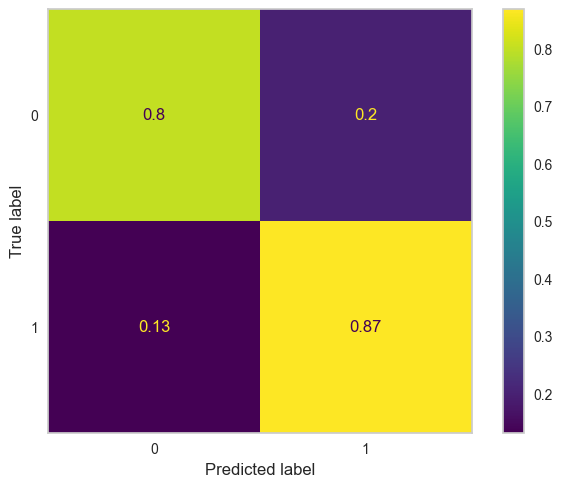

In [6]:
train = x_train.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]
test = x_test.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]

RF = RF.fit(train, y_train)

y_pred= RF.predict(test)

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

RF Accuracy: 0.8406
RF Precision: 0.7627
RF Recall: 0.8491
RF F1: 0.8036
RF Cohen kappa: 0.6701


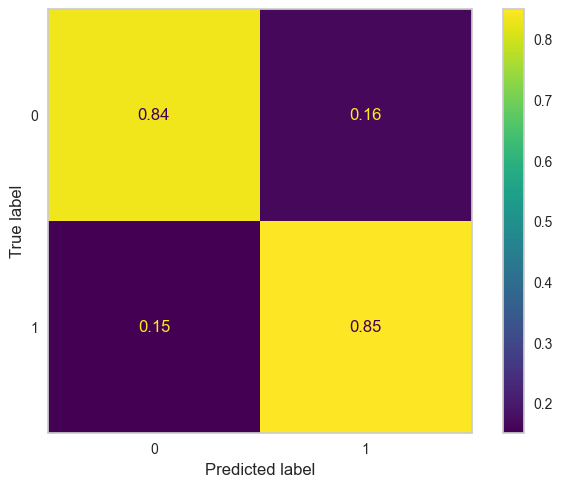

In [7]:
train=x_train.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)
test=x_test.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)

RF = RF.fit(train, y_train)

y_pred= RF.predict(test)

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

RF Accuracy: 0.8261
RF Precision: 0.7042
RF Recall: 0.9434
RF F1: 0.8065
RF Cohen kappa: 0.6545


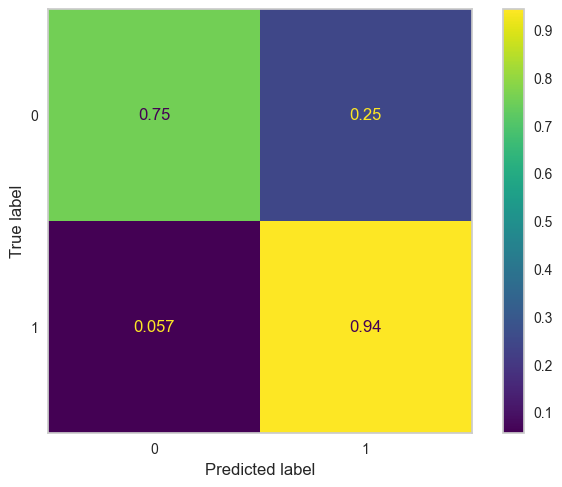

In [8]:
train = x_train.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]
test = x_test.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]

RF = RF.fit(train, y_train)

y_pred= RF.predict(test)

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

RF Accuracy: 0.8333
RF Precision: 0.75
RF Recall: 0.8491
RF F1: 0.7965
RF Cohen kappa: 0.6563


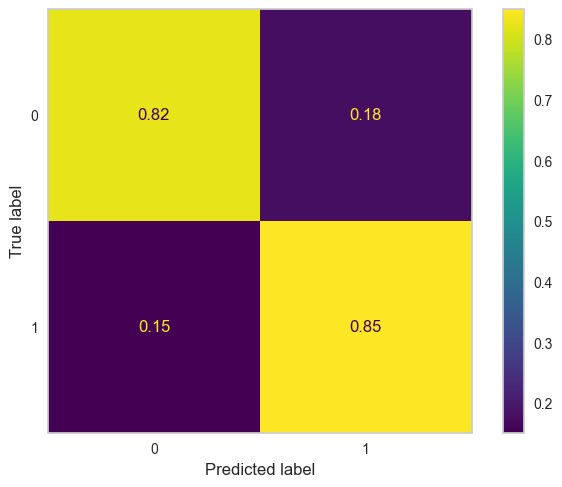

In [9]:
train=x_train.drop(['EducationLevel_w','Citizen_s'],axis=1)
test=x_test.drop(['EducationLevel_w','Citizen_s'],axis=1)

RF = RF.fit(train, y_train)

y_pred= RF.predict(test)

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

# Fold 1

In [10]:
with open('RF_fold1.pickle' , 'rb') as file:
  RF = pickle.load(file)

RF Accuracy: 0.8551
RF Precision: 0.7895
RF Recall: 0.8491
RF F1: 0.8182
RF Cohen kappa: 0.698


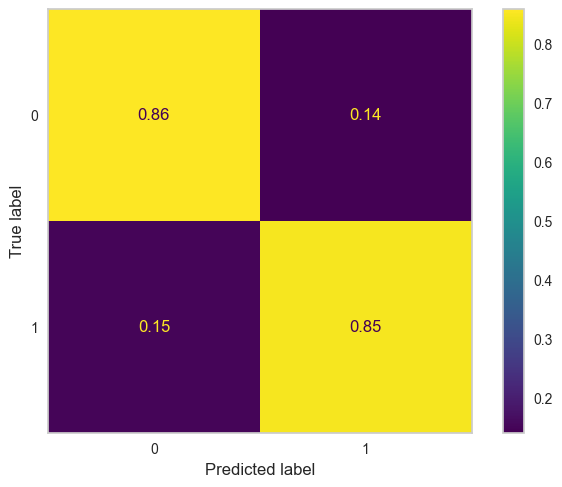

In [11]:
y_pred_RF= RF.predict(x_test)

RF_measurement = measures('RF', y_test, y_pred_RF)
pd.DataFrame(y_pred_RF).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold1_RF.csv')

evaluation_plot(RF, x_test, y_test, y_pred_RF)

### Selected Features with High Positive Impact from Class 1

In [12]:
Fold1 = pd.read_excel('D:/Learn/master/Dissertation/CC_Approval/Fold.xlsx', sheet_name='Fold 1')

RF Accuracy: 0.8261
RF Precision: 0.7302
RF Recall: 0.8679
RF F1: 0.7931
RF Cohen kappa: 0.645


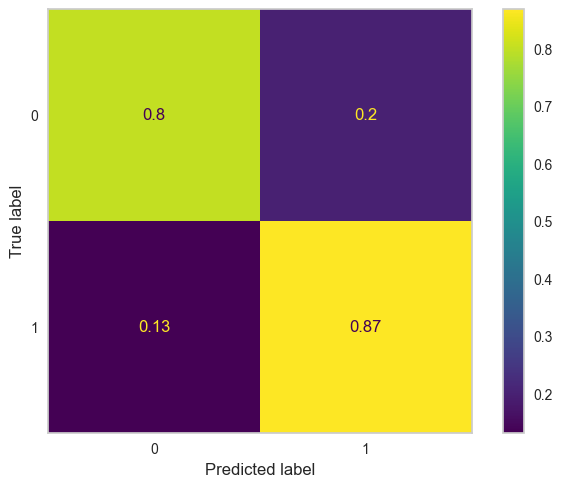

In [13]:
train = Fold1.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]
test = x_test.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]

RF = RF.fit(train, Fold1.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold1_RF1.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 1

RF Accuracy: 0.8406
RF Precision: 0.7627
RF Recall: 0.8491
RF F1: 0.8036
RF Cohen kappa: 0.6701


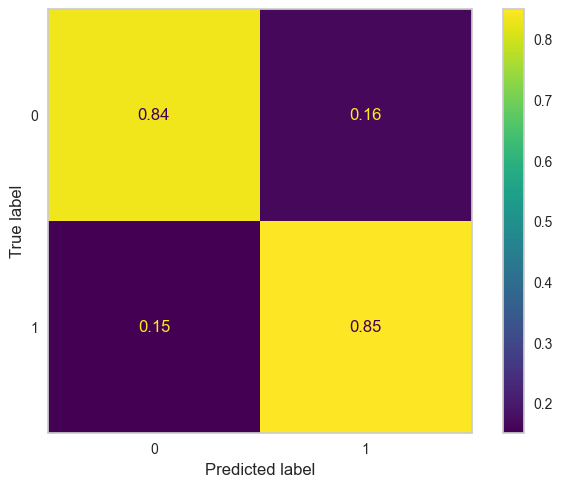

In [14]:
train=Fold1.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc',
                  'ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)

RF = RF.fit(train, Fold1.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold1_RF1D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Selected Features with High Possitive Impact from Class 0

RF Accuracy: 0.8116
RF Precision: 0.6901
RF Recall: 0.9245
RF F1: 0.7903
RF Cohen kappa: 0.6257


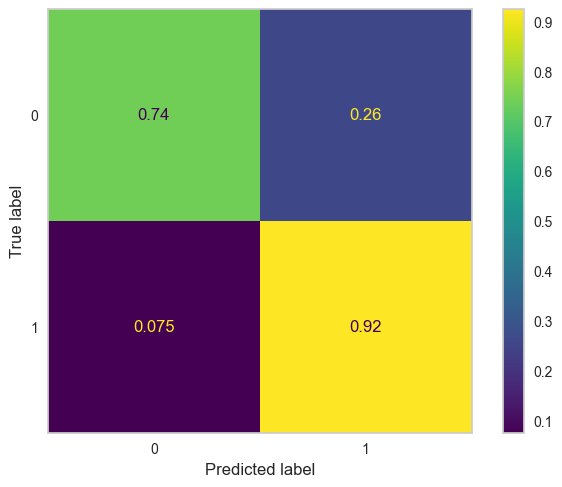

In [15]:
train = Fold1.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]
test = x_test.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]

RF = RF.fit(train, Fold1.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold1_RF0.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 0

RF Accuracy: 0.8478
RF Precision: 0.7759
RF Recall: 0.8491
RF F1: 0.8108
RF Cohen kappa: 0.684


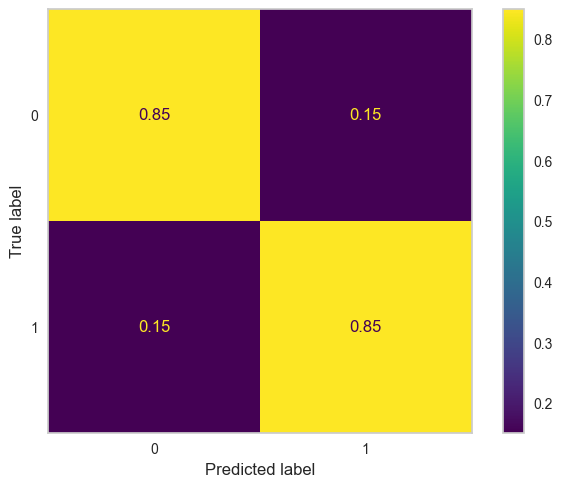

In [16]:
train=Fold1.drop(['EducationLevel_w','Citizen_s','ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['EducationLevel_w','Citizen_s'],axis=1)

RF = RF.fit(train, Fold1.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold1_RF0D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

# Fold 2

In [17]:
with open('RF_fold2.pickle' , 'rb') as file:
  RF = pickle.load(file)

RF Accuracy: 0.8261
RF Precision: 0.7377
RF Recall: 0.8491
RF F1: 0.7895
RF Cohen kappa: 0.6426


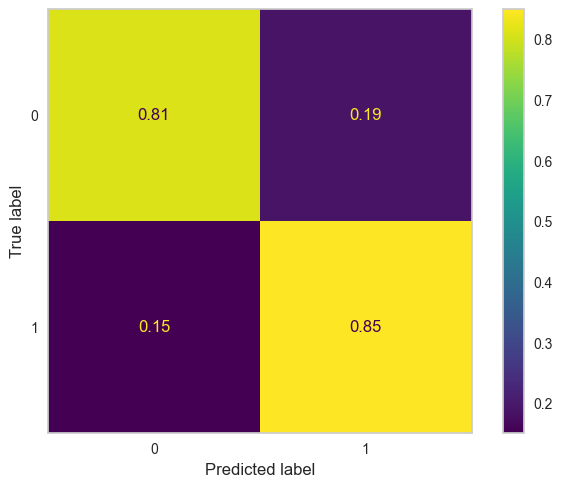

In [18]:
y_pred_RF= RF.predict(x_test)

RF_measurement = measures('RF', y_test, y_pred_RF)
pd.DataFrame(y_pred_RF).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold2_RF.csv')

evaluation_plot(RF, x_test, y_test, y_pred_RF)

In [19]:
Fold2 = pd.read_excel('D:/Learn/master/Dissertation/CC_Approval/Fold.xlsx', sheet_name='Fold 2')

### Selected Features with High Positive Impact from Class 1

RF Accuracy: 0.8333
RF Precision: 0.7344
RF Recall: 0.8868
RF F1: 0.8034
RF Cohen kappa: 0.661


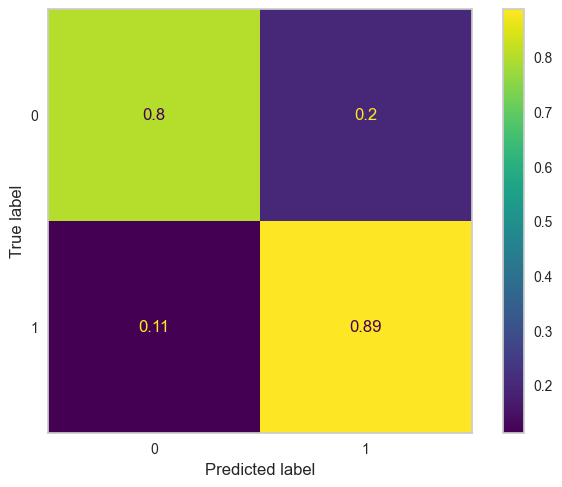

In [20]:
train = Fold2.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]
test = x_test.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]

RF = RF.fit(train, Fold2.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold2_RF1.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 1

RF Accuracy: 0.8551
RF Precision: 0.7895
RF Recall: 0.8491
RF F1: 0.8182
RF Cohen kappa: 0.698


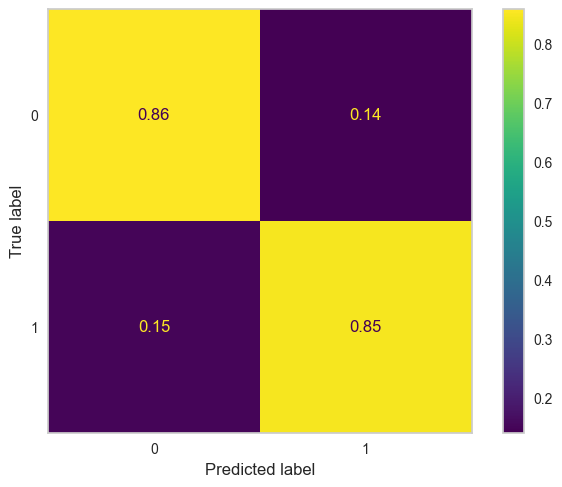

In [21]:
train=Fold2.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc',
                  'ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)

RF = RF.fit(train, Fold2.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold2_RF1D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Selected Features with High Possitive Impact from Class 0

RF Accuracy: 0.8043
RF Precision: 0.6857
RF Recall: 0.9057
RF F1: 0.7805
RF Cohen kappa: 0.61


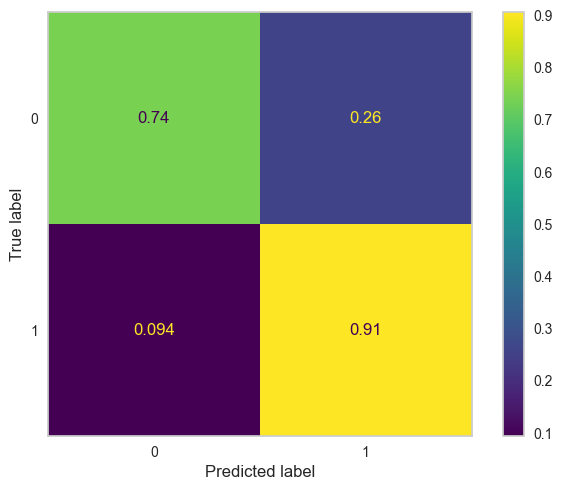

In [22]:
train = Fold2.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]
test = x_test.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]

RF = RF.fit(train, Fold2.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold2_RF0.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 0

RF Accuracy: 0.8478
RF Precision: 0.7759
RF Recall: 0.8491
RF F1: 0.8108
RF Cohen kappa: 0.684


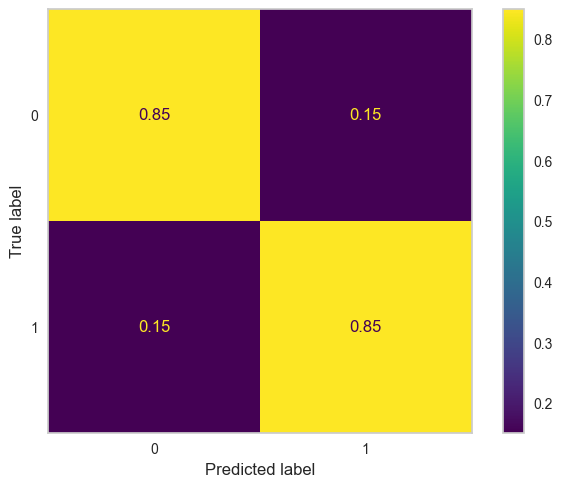

In [23]:
train=Fold2.drop(['EducationLevel_w','Citizen_s','ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['EducationLevel_w','Citizen_s'],axis=1)

RF = RF.fit(train, Fold2.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold2_RF0D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

# Fold 3

In [24]:
with open('RF_fold3.pickle' , 'rb') as file:
  RF = pickle.load(file)

RF Accuracy: 0.8406
RF Precision: 0.7719
RF Recall: 0.8302
RF F1: 0.8
RF Cohen kappa: 0.6678


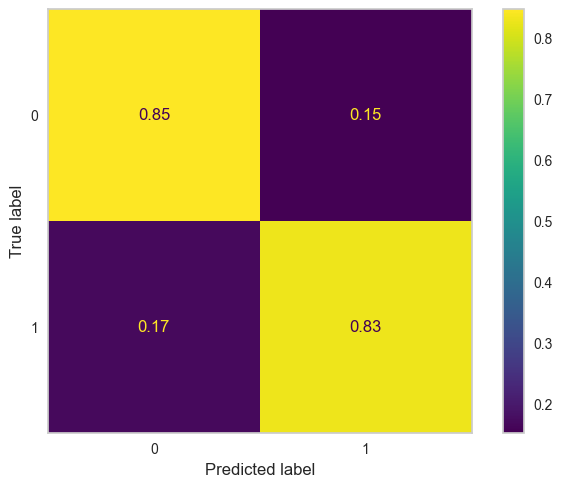

In [25]:
y_pred_RF= RF.predict(x_test)

RF_measurement = measures('RF', y_test, y_pred_RF)
pd.DataFrame(y_pred_RF).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold3_RF.csv')

evaluation_plot(RF, x_test, y_test, y_pred_RF)

In [26]:
Fold3 = pd.read_excel('D:/Learn/master/Dissertation/CC_Approval/Fold.xlsx', sheet_name='Fold 3')

### Selected Features with High Positive Impact from Class 1

RF Accuracy: 0.8333
RF Precision: 0.7344
RF Recall: 0.8868
RF F1: 0.8034
RF Cohen kappa: 0.661


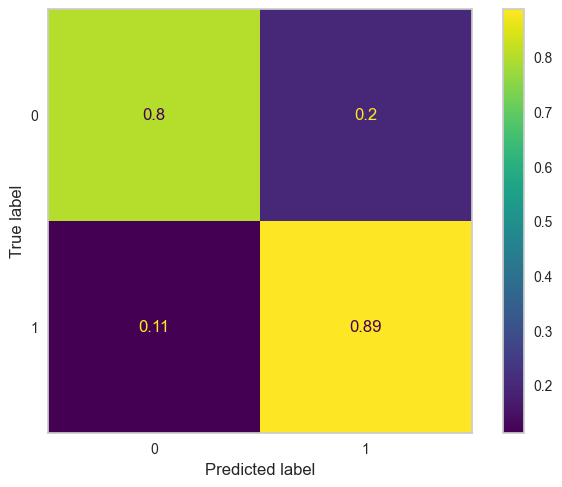

In [27]:
train = Fold3.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]
test = x_test.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]

RF = RF.fit(train, Fold3.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold3_RF1.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 1

RF Accuracy: 0.8551
RF Precision: 0.7895
RF Recall: 0.8491
RF F1: 0.8182
RF Cohen kappa: 0.698


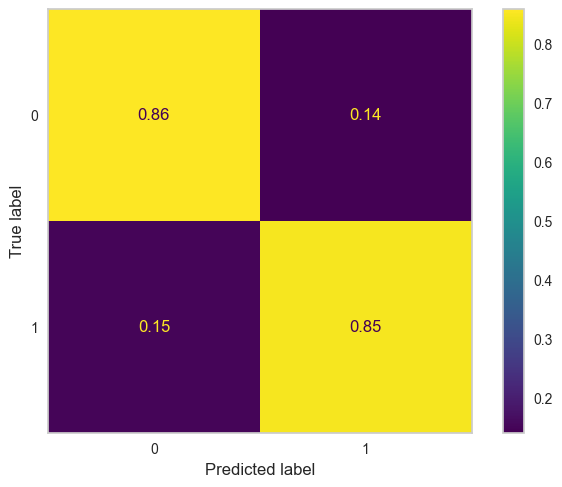

In [28]:
train=Fold3.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc',
                  'ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)

RF = RF.fit(train, Fold3.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold3_RF1D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Selected Features with High Possitive Impact from Class 0

RF Accuracy: 0.8116
RF Precision: 0.6901
RF Recall: 0.9245
RF F1: 0.7903
RF Cohen kappa: 0.6257


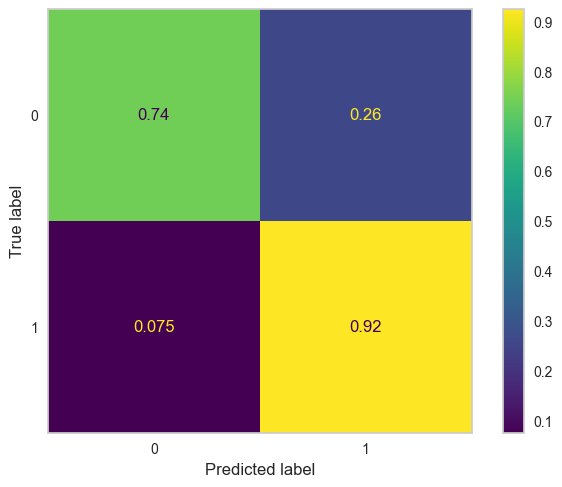

In [29]:
train = Fold3.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]
test = x_test.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]

RF = RF.fit(train, Fold3.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold3_RF0.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 0

RF Accuracy: 0.8333
RF Precision: 0.75
RF Recall: 0.8491
RF F1: 0.7965
RF Cohen kappa: 0.6563


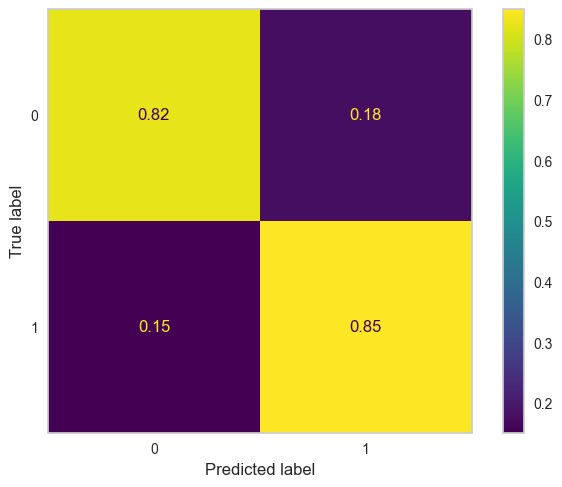

In [31]:
train=Fold3.drop(['EducationLevel_w','Citizen_s','ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['EducationLevel_w','Citizen_s'],axis=1)

RF = RF.fit(train, Fold3.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold3_RF0D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

# Fold 4

In [32]:
with open('RF_fold4.pickle' , 'rb') as file:
  RF = pickle.load(file)

RF Accuracy: 0.8478
RF Precision: 0.7857
RF Recall: 0.8302
RF F1: 0.8073
RF Cohen kappa: 0.6817


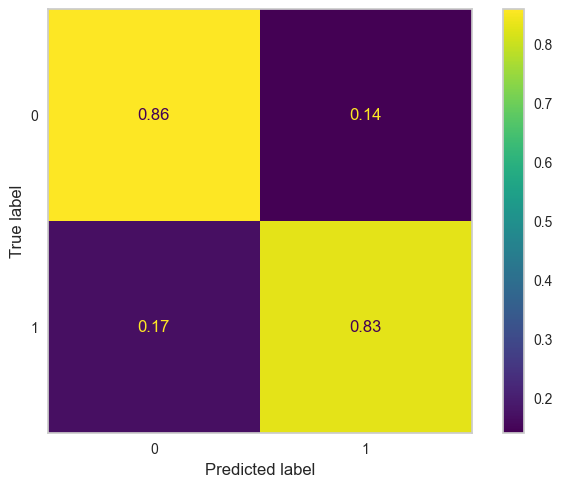

In [33]:
y_pred_RF= RF.predict(x_test)

RF_measurement = measures('RF', y_test, y_pred_RF)
pd.DataFrame(y_pred_RF).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold4_RF.csv')

evaluation_plot(RF, x_test, y_test, y_pred_RF)

In [34]:
Fold4 = pd.read_excel('D:/Learn/master/Dissertation/CC_Approval/Fold.xlsx', sheet_name='Fold 4')

### Selected Features with High Positive Impact from Class 1

RF Accuracy: 0.8333
RF Precision: 0.7344
RF Recall: 0.8868
RF F1: 0.8034
RF Cohen kappa: 0.661


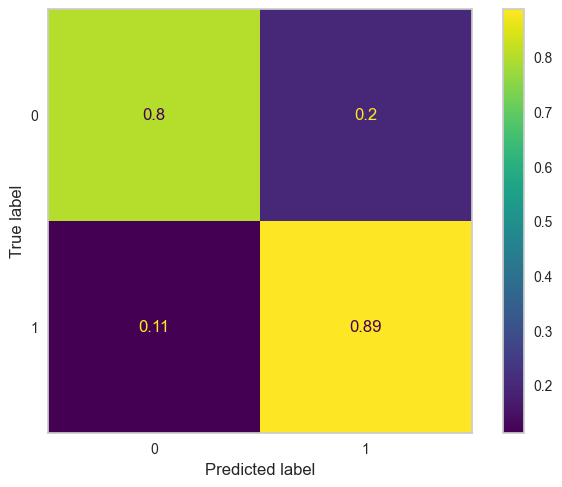

In [35]:
train = Fold4.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]
test = x_test.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]

RF = RF.fit(train, Fold4.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold4_RF1.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 1

RF Accuracy: 0.8406
RF Precision: 0.7627
RF Recall: 0.8491
RF F1: 0.8036
RF Cohen kappa: 0.6701


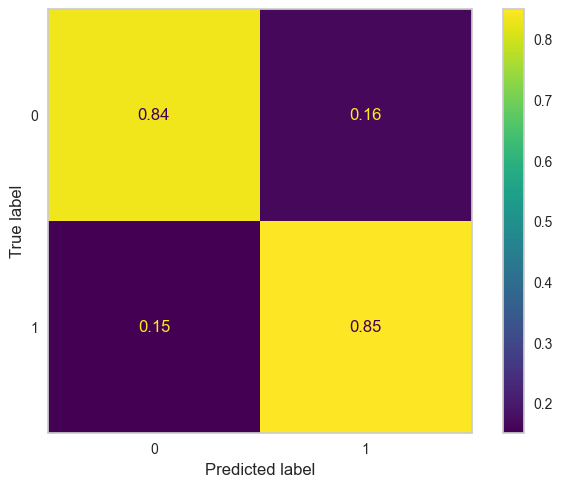

In [36]:
train=Fold4.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc',
                  'ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)

RF = RF.fit(train, Fold4.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold4_RF1D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Selected Features with High Possitive Impact from Class 0

RF Accuracy: 0.8116
RF Precision: 0.6901
RF Recall: 0.9245
RF F1: 0.7903
RF Cohen kappa: 0.6257


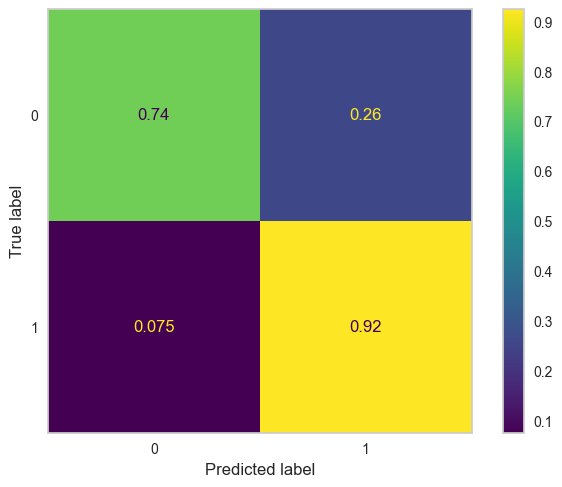

In [37]:
train = Fold4.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]
test = x_test.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]

RF = RF.fit(train, Fold4.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold4_RF0.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 0

RF Accuracy: 0.8406
RF Precision: 0.7627
RF Recall: 0.8491
RF F1: 0.8036
RF Cohen kappa: 0.6701


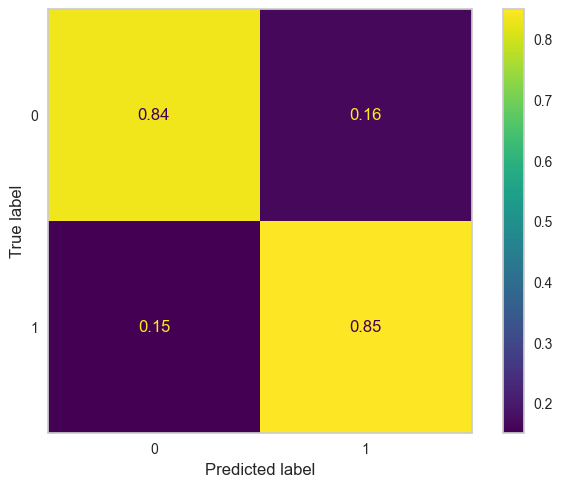

In [38]:
train=Fold4.drop(['EducationLevel_w','Citizen_s','ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['EducationLevel_w','Citizen_s'],axis=1)

RF = RF.fit(train, Fold4.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold4_RF0D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

# Fold 5

In [39]:
with open('RF_fold5.pickle' , 'rb') as file:
  RF = pickle.load(file)

RF Accuracy: 0.8551
RF Precision: 0.7895
RF Recall: 0.8491
RF F1: 0.8182
RF Cohen kappa: 0.698


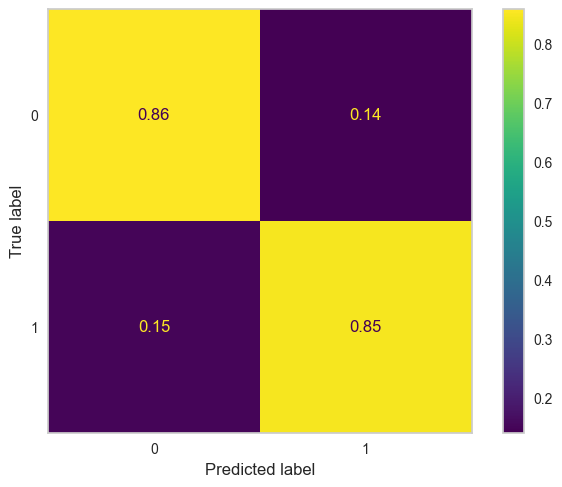

In [40]:
y_pred_RF= RF.predict(x_test)

RF_measurement = measures('RF', y_test, y_pred_RF)
pd.DataFrame(y_pred_RF).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold5_RF.csv')

evaluation_plot(RF, x_test, y_test, y_pred_RF)

In [41]:
Fold5 = pd.read_excel('D:/Learn/master/Dissertation/CC_Approval/Fold.xlsx', sheet_name='Fold 5')

### Selected Features with High Positive Impact from Class 1

RF Accuracy: 0.8261
RF Precision: 0.7302
RF Recall: 0.8679
RF F1: 0.7931
RF Cohen kappa: 0.645


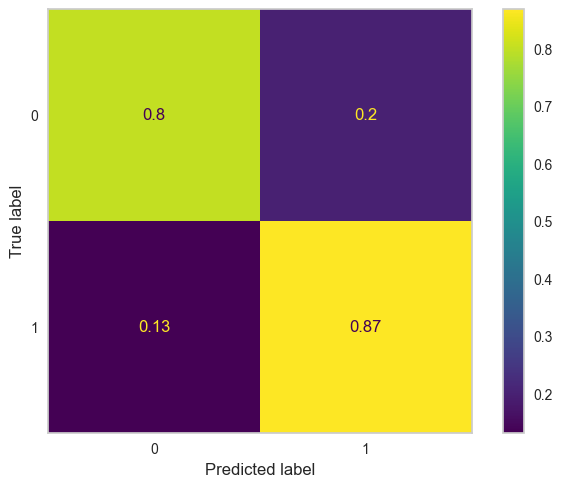

In [42]:
train = Fold5.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]
test = x_test.loc[:, ['PriorDefault','Ethnicity_ff','EducationLevel_ff','Married_y','Citizen_s',
                        'BankCustomer_g','Married_u','BankCustomer_p','EducationLevel_aa']]

RF = RF.fit(train, Fold5.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold5_RF1.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 1

RF Accuracy: 0.8478
RF Precision: 0.7759
RF Recall: 0.8491
RF F1: 0.8108
RF Cohen kappa: 0.684


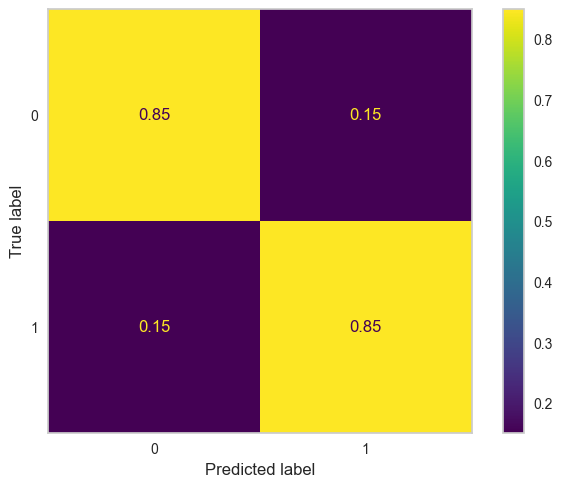

In [43]:
train=Fold5.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc',
                  'ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['Ethnicity_h','EducationLevel_q','EducationLevel_cc'],axis=1)

RF = RF.fit(train, Fold5.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold5_RF1D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Selected Features with High Possitive Impact from Class 0

RF Accuracy: 0.8188
RF Precision: 0.7
RF Recall: 0.9245
RF F1: 0.7967
RF Cohen kappa: 0.6389


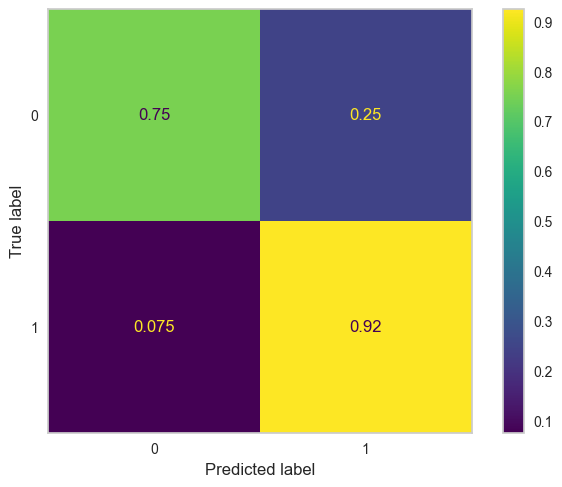

In [44]:
train = Fold5.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]
test = x_test.loc[:, ['Income','CreditScore','EducationLevel_q',
                        'EducationLevel_x','Employed','PriorDefault']]

RF = RF.fit(train, Fold5.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold5_RF0.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)

### Droped Features with High Negative Impact from Class 0

RF Accuracy: 0.8406
RF Precision: 0.7627
RF Recall: 0.8491
RF F1: 0.8036
RF Cohen kappa: 0.6701


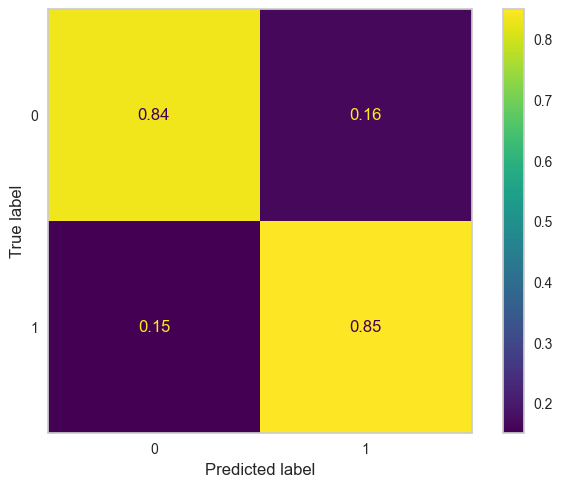

In [45]:
train=Fold5.drop(['EducationLevel_w','Citizen_s','ApprovalStatus','Unnamed: 0'],axis=1)
test=x_test.drop(['EducationLevel_w','Citizen_s'],axis=1)

RF = RF.fit(train, Fold5.loc[:, ['ApprovalStatus']])

y_pred= RF.predict(test)
pd.DataFrame(y_pred).to_csv('C:/Users/acer/OneDrive/Desktop/To Do/RF/Fold5_RF0D.csv')

RF_measurement = measures('RF', y_test, y_pred)

evaluation_plot(RF, test, y_test, y_pred)